In [1]:
import pandas as pd
# import requests
# from bs4 import BeautifulSoup

url_ranking = 'https://data.j-league.or.jp/SFRT08/search?competitionYearEx=2019&competitionIdEx=1&selectedCompetitionName=%E6%98%8E%E6%B2%BB%E5%AE%89%E7%94%B0%E7%94%9F%E5%91%BD%EF%BC%AA%EF%BC%91%E3%83%AA%E3%83%BC%E3%82%B0&selectedCompetitionYear=2019%E5%B9%B4&competitionYear=2019&competitionId=1'
j_ranking = pd.read_html(url_ranking)
# データフレームに変換
j_ranking = pd.DataFrame(j_ranking[0])
#　不要なカラムの削除
j_ranking = j_ranking.drop(18)
j_ranking = j_ranking.drop(['Unnamed: 19'], axis=1)

j_ranking

,チーム名,試合,試合時間,得点,1試合平均得点,PK得点,PK,失点,1試合平均失点,PK失点,被PK,シュート,被シュート,FK,CK,反則,警告,退場,退席
0,北海道コンサドーレ札幌,34.0,3060.0,54,1.59,3,3,49.0,1.44,3,5,391,373,426,181,532,48,1,0
1,ベガルタ仙台,34.0,3060.0,38,1.12,2,3,45.0,1.32,5,5,375,372,436,172,439,31,2,0
2,鹿島アントラーズ,34.0,3060.0,54,1.59,5,5,30.0,0.88,1,1,358,337,490,164,460,36,0,0
3,浦和レッズ,34.0,3060.0,34,1.00,4,4,50.0,1.47,3,3,312,378,480,142,526,43,3,0
4,ＦＣ東京,34.0,3060.0,46,1.35,4,5,29.0,0.85,0,0,305,305,469,173,450,29,0,0
5,川崎フロンターレ,34.0,3060.0,57,1.68,1,2,34.0,1.00,1,1,383,236,437,173,434,36,1,0
6,横浜Ｆ・マリノス,34.0,3060.0,68,2.00,9,9,38.0,1.12,2,2,449,302,682,209,502,41,4,0
7,湘南ベルマーレ,34.0,3060.0,40,1.18,2,2,63.0,1.85,4,4,354,424,457,156,534,48,1,0
8,松本山雅ＦＣ,34.0,3060.0,21,0.62,1,1,40.0,1.18,4,4,293,355,425,146,470,34,0,0
9,清水エスパルス,34.0,3060.0,45,1.32,3,3,69.0,2.03,3,3,320,372,431,144,395,36,1,0


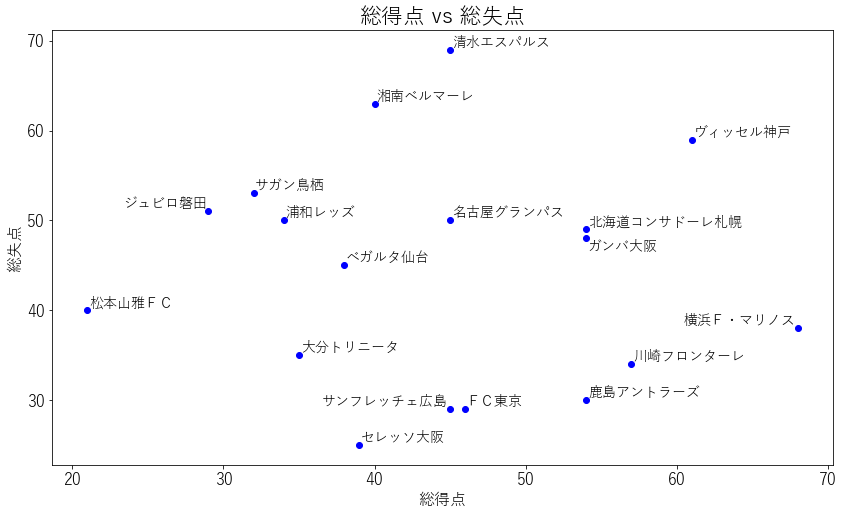

In [2]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
# フォントを設定
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

teams = j_ranking.loc[:, 'チーム名'].values
x_coords = j_ranking.loc[:, '得点'].values
y_coords = j_ranking.loc[:, '失点'].values

plt.figure(figsize=(14, 8))
plt.plot(x_coords, y_coords, 'bo')
plt.title('総得点 vs 総失点', fontsize=22)
plt.xlabel('総得点', fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('総失点', fontsize=16);
plt.yticks(fontsize=16)

 
texts = [plt.text(x_coords[i], y_coords[i], team,fontsize=14) for i, team in enumerate(teams)]
from adjustText import adjust_text #文字の重なりを防ぐ
adjust_text(texts);



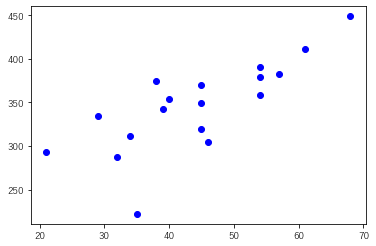

In [3]:
teams = j_ranking.loc[:, 'チーム名'].values
x_coords = j_ranking.loc[:, '得点'].values
y_coords = j_ranking.loc[:, 'シュート'].values

plt.plot(x_coords, y_coords, 'bo');

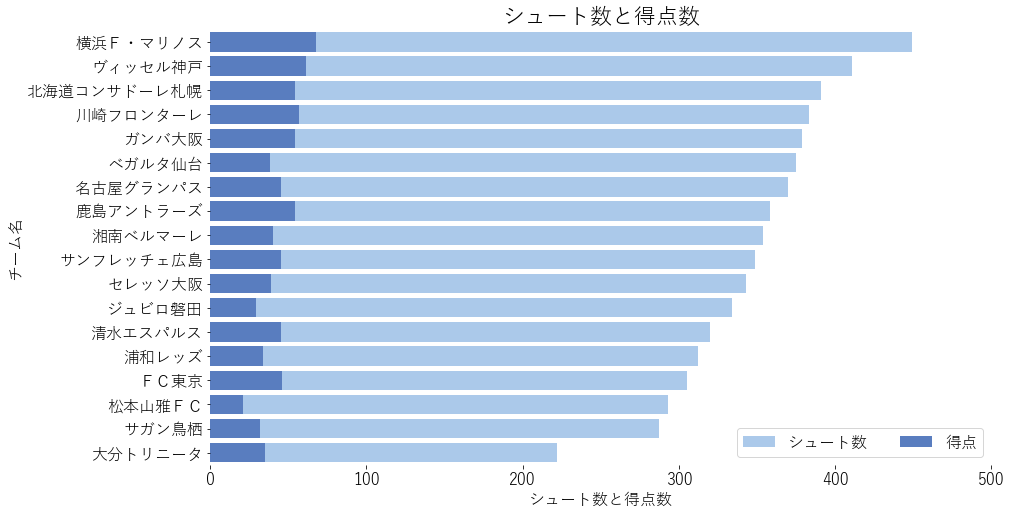

In [4]:
import seaborn as sns
f, ax = plt.subplots(figsize=(14, 8))

# シュート数で表示順番を変更
j_ranking = j_ranking.sort_values(['シュート'],ascending=False ).reset_index(drop=True)

# シュート数のPlot作成
sns.set_color_codes("pastel")
sns.barplot(x="シュート", y="チーム名", data=j_ranking,
            label="シュート数", color="b")

# 得点数のプロット作成
sns.set_color_codes("muted")
sns.barplot(x="得点", y="チーム名", data=j_ranking,
            label="得点", color="b")

# タイトルなどの設定
ax.legend(ncol=2, loc="lower right", frameon=True, fontsize=16)
ax.set(xlim=(0, 500),ylabel="チーム",
       xlabel="シュート数")
sns.despine(left=True, bottom=True)

plt.title('シュート数と得点数', fontsize=22)
plt.xlabel('シュート数と得点数', fontsize=16)
plt.ylabel('チーム名', fontsize=16);
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

plt.savefig('num_g_s.png',bbox_inches = 'tight');

In [5]:
import numpy as np
# ゴール率カラムをデータフレームに作成
j_ranking['ゴール率'] = j_ranking['得点'] / j_ranking['シュート'] 
j_ranking.head()

,チーム名,試合,試合時間,得点,1試合平均得点,PK得点,PK,失点,1試合平均失点,PK失点,被PK,シュート,被シュート,FK,CK,反則,警告,退場,退席,ゴール率
0,横浜Ｆ・マリノス,34.0,3060.0,68,2.00,9,9,38.0,1.12,2,2,449,302,682,209,502,41,4,0,0.151448
1,ヴィッセル神戸,34.0,3060.0,61,1.79,7,8,59.0,1.74,2,4,411,395,422,181,498,38,2,0,0.148418
2,北海道コンサドーレ札幌,34.0,3060.0,54,1.59,3,3,49.0,1.44,3,5,391,373,426,181,532,48,1,0,0.138107
3,川崎フロンターレ,34.0,3060.0,57,1.68,1,2,34.0,1.00,1,1,383,236,437,173,434,36,1,0,0.148825
4,ガンバ大阪,34.0,3060.0,54,1.59,2,3,48.0,1.41,2,3,379,389,417,187,456,38,0,0,0.142480


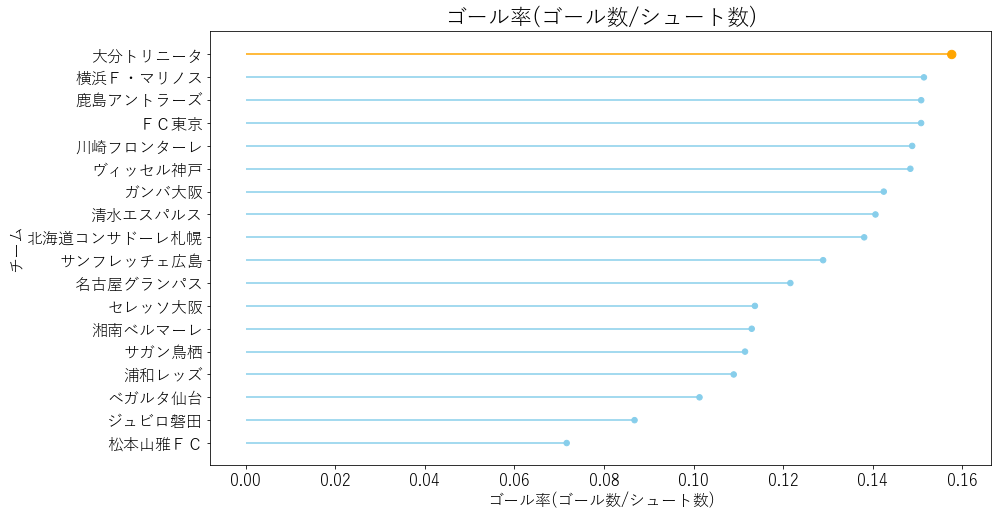

In [6]:
import numpy as np
# ゴール率カラムをデータフレームに作成
j_ranking['ゴール率'] = j_ranking['得点'] / j_ranking['シュート'] 

# ゴール率で表示順番をソート
j_ranking = j_ranking.sort_values(by='ゴール率')

# 表示チーム数のレンジを取得
my_range=range(1,len(j_ranking.index)+1)
 
# 表示設定
my_color=np.where(j_ranking['チーム名']=='大分トリニータ', 'orange', 'skyblue')
my_size=np.where(j_ranking['チーム名']=='大分トリニータ', 70, 30)
plt.figure(figsize=(14, 8))
plt.hlines(y=my_range, xmin=0, xmax=j_ranking['ゴール率'] , color= my_color,)
plt.scatter(j_ranking['ゴール率'], my_range, color=my_color, s=my_size, alpha=1)
plt.title("ゴール率(ゴール数/シュート数)", loc='center',fontsize=22)
plt.xticks(fontsize=16)
plt.yticks(my_range, j_ranking['チーム名'],fontsize=16)
plt.xlabel('ゴール率(ゴール数/シュート数)',fontsize=16)
plt.ylabel('チーム',fontsize=16);

plt.savefig('prop_g.png', bbox_inches = 'tight');

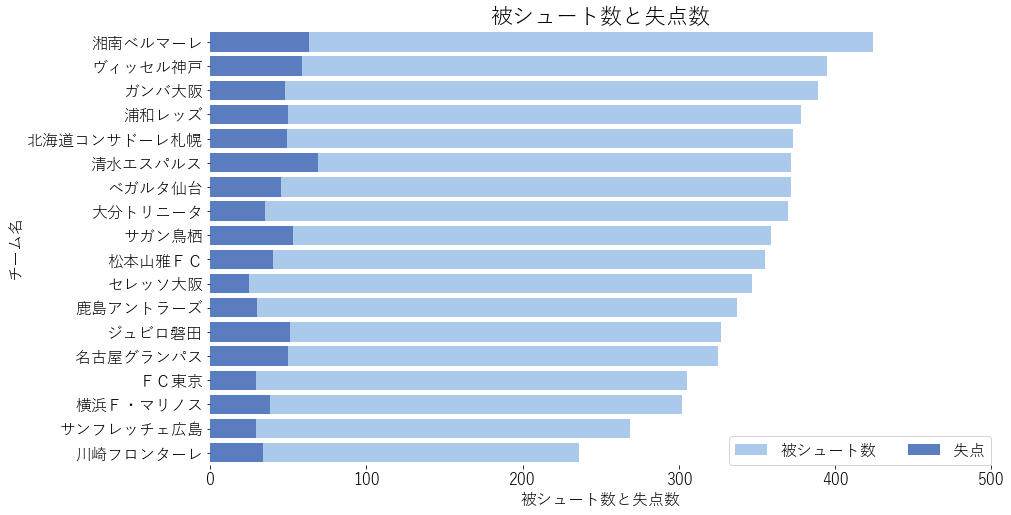

In [7]:
f, ax = plt.subplots(figsize=(14, 8))

# 被シュート数で表示順番を変更
j_ranking = j_ranking.sort_values(['被シュート'],ascending=False ).reset_index(drop=True)

# 得点数のプロット作成
sns.set_color_codes("pastel")
sns.barplot(x="被シュート", y="チーム名", data=j_ranking,
            label="被シュート数", color="b")

# タイトルなどの設定
sns.set_color_codes("muted")
sns.barplot(x="失点", y="チーム名", data=j_ranking,
            label="失点", color="b")
ax.legend(ncol=2, loc='lower right', borderaxespad=0,fontsize=16)
ax.set(xlim=(0, 500))
sns.despine(left=True, bottom=True)

plt.title('被シュート数と失点数', fontsize=22)
plt.xlabel('被シュート数と失点数', fontsize=16)
plt.ylabel('チーム名', fontsize=16);
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

plt.savefig('num_g_s_a.png',bbox_inches = 'tight');

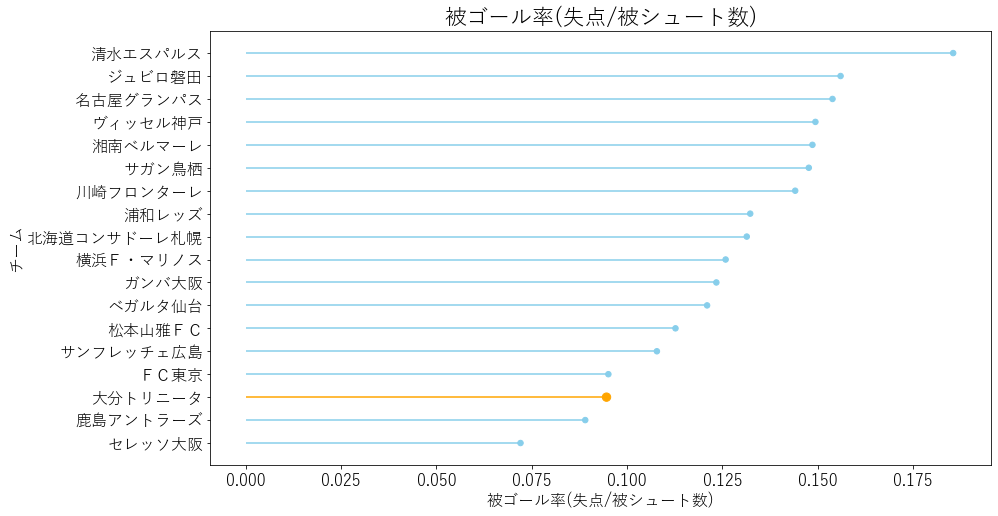

In [10]:
# 被ゴール率カラムをデータフレームに作成
j_ranking['被ゴール率'] = j_ranking['失点'] / j_ranking['被シュート'] 

# 被ゴール率で表示順番をソート
j_ranking = j_ranking.sort_values(by='被ゴール率')
my_range=range(1,len(j_ranking.index)+1)
 
# 表示設定
my_color=np.where(j_ranking['チーム名']=='大分トリニータ', 'orange', 'skyblue')
my_size=np.where(j_ranking['チーム名']=='大分トリニータ', 70, 30)
plt.figure(figsize=(14, 8))
plt.hlines(y=my_range, xmin=0, xmax=j_ranking['被ゴール率'] , color= my_color,)
plt.scatter(j_ranking['被ゴール率'], my_range, color=my_color, s=my_size, alpha=1)
plt.yticks(my_range, j_ranking['チーム名'])
plt.title("被ゴール率(失点/被シュート数)", loc='center',fontsize=22)
plt.xlabel('被ゴール率(失点/被シュート数)',fontsize=16)
plt.ylabel('チーム',fontsize=16);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

plt.savefig('prop_g_a.png', bbox_inches = 'tight');

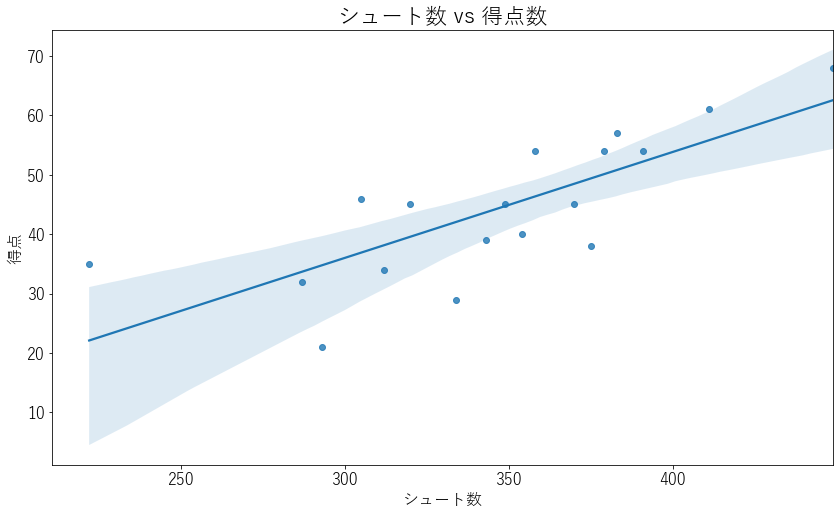

In [11]:
plt.figure(figsize=(14, 8))

# regplotでデータとlinear regression model fitを表示
sns.regplot(data = j_ranking, x = 'シュート', y = '得点');

# 表示設定
plt.title('シュート数 vs 得点数', fontsize=22)
plt.xlabel('シュート数', fontsize=16)
plt.ylabel('得点', fontsize=16);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

plt.savefig('corr_s.png');

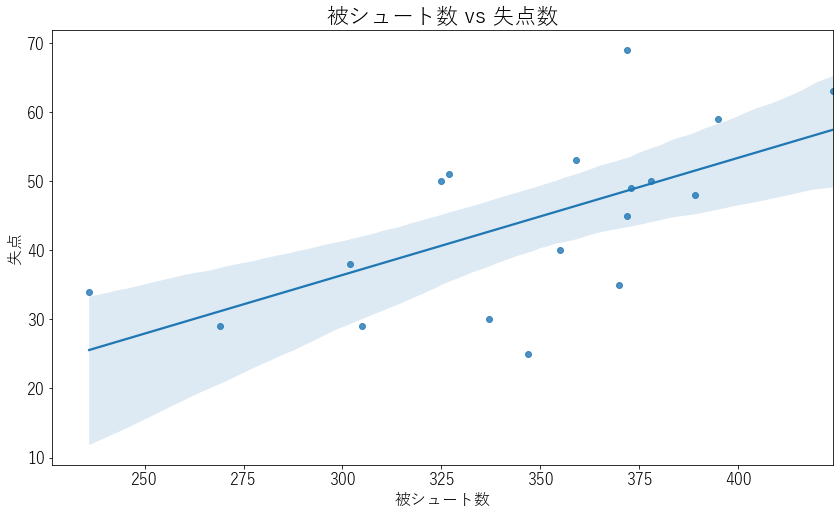

In [12]:
plt.figure(figsize=(14, 8))

# regplotでデータとlinear regression model fitを表示
sns.regplot(data = j_ranking, x = '被シュート', y = '失点');

# 表示設定
plt.title('被シュート数 vs 失点数', fontsize=22)
plt.xlabel('被シュート数', fontsize=16)
plt.ylabel('失点', fontsize=16);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

plt.savefig('corr_s_a.png');

In [14]:
# データ取得
url_score ='https://data.j-league.or.jp/SFRT09/search?yearFlag=false&competition_id=1&sub_competition_id=&section_id=0&number=&competition_year_id=2019&competition_year=2019%E5%B9%B4&competitionName=%E6%98%8E%E6%B2%BB%E5%AE%89%E7%94%B0%E7%94%9F%E5%91%BD%EF%BC%AA%EF%BC%91%E3%83%AA%E3%83%BC%E3%82%B0&sub_competition=&sectionName=%E6%9C%80%E6%96%B0%E7%AF%80&section_id=0&sub_error_flag=&sub_competition_flag=1'
j_score = pd.read_html(url_score)
# データフレームに変換
j_score = pd.DataFrame(j_score[0])
j_score.head()

,順位,選手名,現所属(J最終所属),得点,シュート,PK得点,PK,出場,Unnamed: 8
0,1,マルコス ジュニオール,横浜Ｆ・マリノス,15,57,5,5,33,NaN
1,1,仲川 輝人,横浜Ｆ・マリノス,15,66,0,0,33,NaN
2,3,ディエゴ オリヴェイラ,ＦＣ東京,14,70,4,5,33,NaN
3,3,ドウグラス,清水エスパルス,14,68,2,2,30,NaN
4,5,鈴木 武蔵,北海道コンサドーレ札幌,13,81,2,2,33,NaN


In [21]:
# 4点以上取得してるプレイヤーのみに絞る
j_score_sub = j_score[j_score['得点'] >= 5]

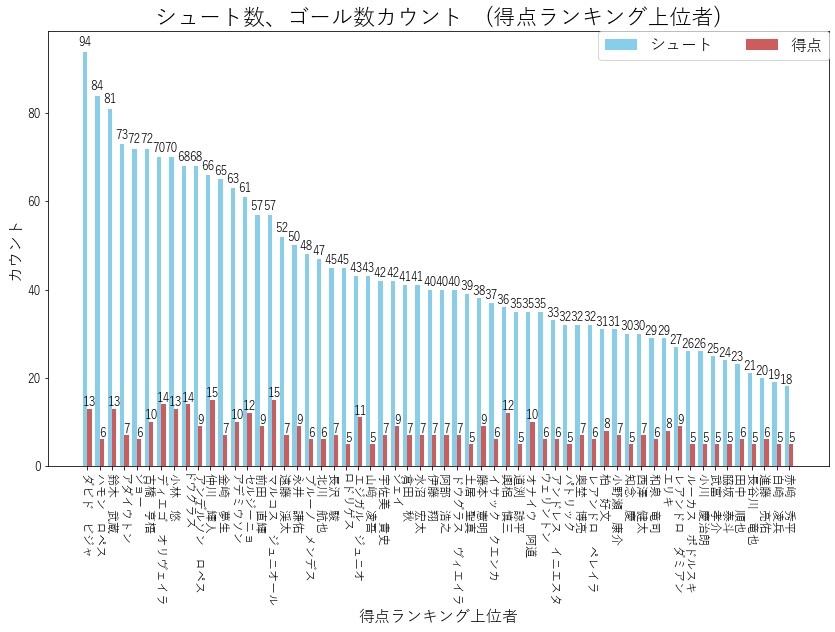

In [22]:
# シュート数でソート
j_score_sub =j_score_sub.sort_values(by='シュート',ascending=False)

 # x軸のポジションと、バーの幅を設定
ind = np.arange(len(j_score_sub['シュート'])) 
width = 0.35 

fig, ax = plt.subplots(figsize=(14,8))

# シュート数のバー作成
rects1 = ax.bar(ind - width/2, j_score_sub['シュート'], width, 
                color='SkyBlue', label='シュート')

# 得点数のバー作成
rects2 = ax.bar(ind + width/2, j_score_sub['得点'], width, 
                color='IndianRed', label='得点')

# テキストやラベルなどの設定
def autolabel(rects, xpos='center'):
    """
    シュート数、得点数のテキストをバーの上に表示
    """

    xpos = xpos.lower()  
    ha = {'center': 'center', 'right': 'center', 'left': 'center'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], fontsize=12,va='bottom')

autolabel(rects1, "left")
autolabel(rects2, "right")


# テキストやラベルなどの設定
ax.set_xticks(ind)
ax.set_xticklabels( j_score_sub['選手名'])
ax.legend(ncol=2, borderaxespad=0,fontsize=16)
plt.title('シュート数、ゴール数カウント　(得点ランキング上位者)', fontsize=22)
plt.xlabel('得点ランキング上位者', fontsize=16)
plt.ylabel('カウント', fontsize=16);
plt.xticks(fontsize=12,rotation = -90);
plt.yticks(fontsize=12);

plt.savefig('count_s_g.png', bbox_inches = 'tight');

plt.show()

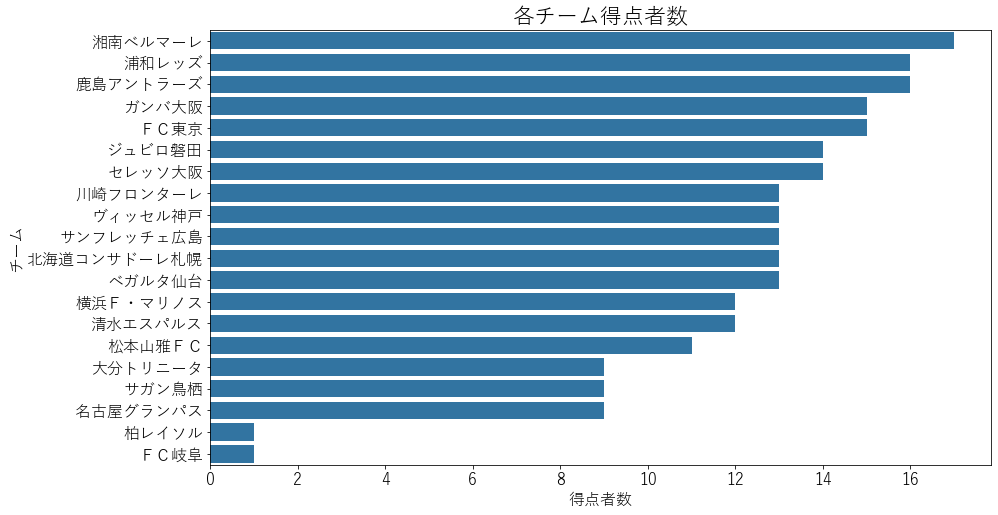

In [23]:
# 得点を決めている選手が多い順で、チーム名取得
score_counts = j_score['現所属(J最終所属)'].value_counts().index

plt.figure(figsize=(14, 8))

base_color = sns.color_palette()[0]

# countplotで各チームの得点者数を獲得。表示順番を得点者数が多い順にする。
sns.countplot(data = j_score, y = '現所属(J最終所属)',color=base_color, order=score_counts);

# 表示設定
plt.title('各チーム得点者数', fontsize=22)
plt.xlabel('得点者数', fontsize=16)
plt.ylabel('チーム', fontsize=16);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

plt.savefig('count_p_g.png', bbox_inches = 'tight');